In [4]:
# Import libraries
import glob
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import datetime
from dateutil import parser
import seaborn as sns

In [6]:
df = pd.read_csv("./Draft Cleaned Merged.csv")
df.head()

,time,depth,latitude,longitude,Tdir,Tper,Thgt,sdir,sper,shgt,...,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,Exist
0,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,0.56,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
1,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,0.56,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
2,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,0.56,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
3,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,0.56,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
4,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,0.56,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True


In [48]:
y = df["SOG"]
x = df.drop([ "VesselName", "IMO", "CallSign", "latitude", "longitude", "time", "BaseDateTime", "MMSI", "TransceiverClass", "Exist", "depth"], axis = 1)

In [49]:
x.corr(method ='pearson')

,Tdir,Tper,Thgt,sdir,sper,shgt,wdir,wper,whgt,SOG,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo
Tdir,1.000000,-0.589622,0.119382,0.978535,-0.677285,0.044306,-0.492141,-0.235801,-0.195454,0.130290,-0.225762,-0.197025,0.154603,-0.217324,0.389926,0.332826,0.316171,0.200863
Tper,-0.589622,1.000000,-0.387334,-0.572548,0.952481,0.160026,0.775737,-0.445201,-0.412771,0.146561,0.216574,0.218014,-0.540190,0.069936,-0.364255,-0.390818,-0.227359,-0.474096
Thgt,0.119382,-0.387334,1.000000,0.081911,-0.334455,0.501495,-0.080480,0.513343,0.640324,-0.184913,-0.062158,0.095982,0.074257,-0.002245,0.135276,0.188229,0.166698,0.000217
sdir,0.978535,-0.572548,0.081911,1.000000,-0.703667,0.013769,-0.477775,-0.215541,-0.192404,0.122745,-0.234715,-0.201361,0.169336,-0.217309,0.414874,0.350859,0.321110,0.210333
sper,-0.677285,0.952481,-0.334455,-0.703667,1.000000,0.116856,0.747511,-0.383485,-0.325933,0.135540,0.260504,0.244863,-0.564341,0.098440,-0.440130,-0.437748,-0.263085,-0.494379
shgt,0.044306,0.160026,0.501495,0.013769,0.116856,1.000000,0.149569,-0.251638,-0.233309,-0.046900,-0.127112,0.246540,-0.256535,0.021386,-0.182951,-0.229706,-0.207798,-0.336916
wdir,-0.492141,0.775737,-0.080480,-0.477775,0.747511,0.149569,1.000000,-0.259989,-0.184262,0.212030,0.214610,0.222309,-0.407728,0.050309,-0.284807,-0.298036,-0.207754,-0.325716
wper,-0.235801,-0.445201,0.513343,-0.215541,-0.383485,-0.251638,-0.259989,1.000000,0.926060,-0.335349,0.026785,-0.073457,0.432633,0.113145,0.247737,0.327391,0.233567,0.335642
whgt,-0.195454,-0.412771,0.640324,-0.192404,-0.325933,-0.233309,-0.184262,0.926060,1.000000,-0.325238,0.066662,-0.051669,0.328878,0.069337,0.255718,0.358514,0.312791,0.251950
SOG,0.130290,0.146561,-0.184913,0.122745,0.135540,-0.046900,0.212030,-0.335349,-0.325238,1.000000,0.186954,-0.179059,-0.179182,-0.026052,-0.062567,-0.066592,-0.006700,-0.064796


In [42]:
for col in x.columns:
    tempX = x[col]
    plt.scatter(tempX, y)
    plt.show()

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5843    0.0
5844    0.0
5845    0.0
5846    0.0
5847    0.0
Name: depth, Length: 5848, dtype: float64
0       198.0
1       198.0
2       198.0
3       198.0
4       198.0
        ...  
5843     75.0
5844     75.0
5845     75.0
5846     75.0
5847     75.0
Name: Tdir, Length: 5848, dtype: float64
0       6.024096
1       6.024096
2       6.024096
3       6.024096
4       6.024096
          ...   
5843    8.474576
5844    8.474576
5845    8.474576
5846    8.474576
5847    8.474576
Name: Tper, Length: 5848, dtype: float64
0       0.79
1       0.79
2       0.79
3       0.79
4       0.79
        ... 
5843    0.82
5844    0.82
5845    0.82
5846    0.82
5847    0.82
Name: Thgt, Length: 5848, dtype: float64
0       213.0
1       213.0
2       213.0
3       213.0
4       213.0
        ...  
5843     71.0
5844     71.0
5845     71.0
5846     71.0
5847     71.0
Name: sdir, Length: 5848, dtype: float64
0       5.90
1       5.9

Text(0.5, 1.0, 'Correlation')

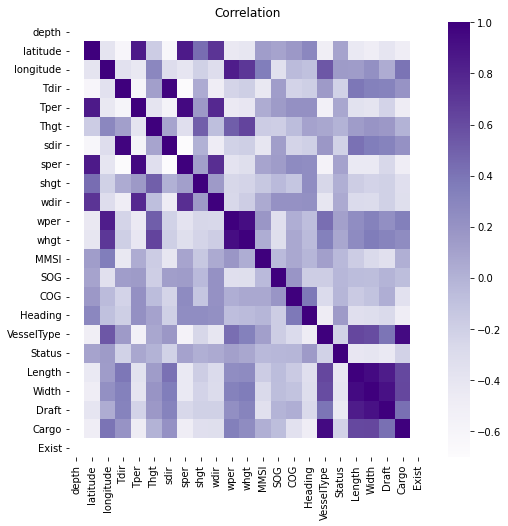

In [36]:
# using heatmap to find correlation
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(df.corr(method ='pearson'), cmap="Purples")
heatmap.set_title("Correlation")